# **DataCamp.Course_053_Sampling in Python**

### **Course Description**

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population. In this Sampling in Python course, you’ll discover when to use sampling and how to perform common types of sampling—from simple random sampling to more complex methods like stratified and cluster sampling. Using real-world datasets, including coffee ratings, Spotify songs, and employee attrition, you’ll learn to estimate population statistics and quantify uncertainty in your estimates by generating sampling distributions and bootstrap distributions.


In [85]:
# read_feather function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_feather_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_feather('{}.feather'.format(file_name))
    return df

coffee_ratings = read_feather_fun('datasets','coffee_ratings_full', dir)
print(coffee_ratings.head(5))

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  

In [86]:
spotify_population = read_feather_fun('datasets','spotify_2000_2020', dir)
print(spotify_population.head(5))

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode         

In [87]:
attrition_pop = read_feather_fun('datasets','attrition', dir)
print(attrition_pop.head(5))

   Age  Attrition     BusinessTravel  DailyRate            Department  \
0   21        0.0      Travel_Rarely        391  Research_Development   
1   19        1.0      Travel_Rarely        528                 Sales   
2   18        1.0      Travel_Rarely        230  Research_Development   
3   18        0.0      Travel_Rarely        812                 Sales   
4   18        1.0  Travel_Frequently       1306                 Sales   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                15        College  Life_Sciences                    High   
1                22  Below_College      Marketing               Very_High   
2                 3       Bachelor  Life_Sciences                    High   
3                10       Bachelor        Medical               Very_High   
4                 5       Bachelor      Marketing                  Medium   

   Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0    Male  ...    

## **Introduction to Sampling (Module 01-053)**

#### **Sampling and point estimates**

1. Sampling households
Cheaper to ask a small number of households
and use statistics to estimate the population
Working with a subset of the whole population
is called sampling
2. Population vs. sample
The population is the complete dataset
Doesn't have to refer to people
Typically, don't know what the whole population is
The sample is the subset of data you calculate on
3. Coffee rating dataset
Each row represents 1 coffee
1338 rows
We'll treat this as the population
4. Points vs. flavor: population
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
5. Points vs. flavor: 10 row sample
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
6. Python sampling for Series
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
7. Population parameters & point estimates
import numpy as np
np.mean(pts_vs_flavor_pop['total_cup_points'])
np.mean(cup_points_samp)
8. Point estimates with pandas
pts_vs_flavor_pop['flavor'].mean()
pts_vs_flavor_samp['flavor'].mean()

In [88]:
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
print(pts_vs_flavor_pop)
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
print(pts_vs_flavor_samp)
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
print(cup_points_samp)


      total_cup_points  flavor
0                90.58    8.83
1                89.92    8.67
2                89.75    8.50
3                89.00    8.58
4                88.83    8.50
...                ...     ...
1333             78.75    7.58
1334             78.08    7.67
1335             77.17    7.33
1336             75.08    6.83
1337             73.75    6.67

[1338 rows x 2 columns]
      total_cup_points  flavor
1196             79.08    7.25
233              84.08    7.67
498              83.00    7.67
250              84.00    7.75
896              81.58    7.42
1154             79.75    7.25
571              82.83    7.50
34               86.25    8.08
1114             80.08    7.17
857              81.83    7.50
1144    79.75
585     82.75
1058    80.67
651     82.58
1142    79.83
479     83.08
238     84.08
968     81.25
734     82.25
447     83.17
Name: total_cup_points, dtype: float64


In [89]:
import numpy as np
display(
    np.mean(pts_vs_flavor_pop['total_cup_points'])
)
display(
    np.mean(cup_points_samp)
)
display(
    pts_vs_flavor_pop['flavor'].mean()
)
display(
    pts_vs_flavor_samp['flavor'].mean()
)

82.15120328849028

81.941

7.526046337817639

7.526000000000001

Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

spotify_population is available and pandas is loaded as pd.

In [90]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)


       acousticness                                            artists  \
26615      0.000021                        ['Five Finger Death Punch']   
13917      0.958000                               ['Imaginary Future']   
10760      0.230000                            ['Benjy Davis Project']   
15824      0.000014                        ['Five Finger Death Punch']   
20111      0.078900                                            ['BTS']   
...             ...                                                ...   
39256      0.016900  ['League of Legends', 'The Glitch Mob', 'Mako'...   
15821      0.994000                          ['Native American Flute']   
33637      0.165000                                  ['Stevie Wonder']   
29995      0.932000                                ['Amanda Seyfried']   
22789      0.051300                                       ['Rod Wave']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
26615         0.485     224906.0       

Simple sampling and calculating with NumPy
You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

spotify_population is available and numpy is loaded as np.

In [91]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.441619999999998


#### **Convenience sampling**

1. The Literary Digest election prediction
Prediction: Landon gets 57%; Roosevelt gets 43%
Actual results: Landon got 38%; Roosevelt got 62%
Sample not representative of population, causing sample bias
Collecting data by the easiest method is called convenience sampling
2. Convenience sampling coffee ratings
coffee_ratings["total_cup_points"].mean()
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()
3. Visualizing selection bias
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()
4. Visualizing selection bias for a random sample
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

In [92]:
display(
coffee_ratings["total_cup_points"].mean()
)

display(
coffee_ratings_first10 = coffee_ratings.head(10)
)


coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()


82.15120328849028

89.1

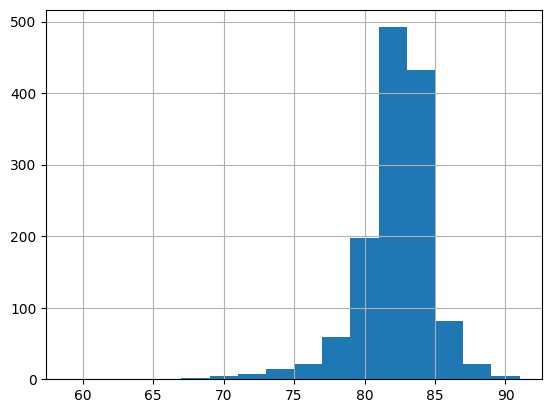

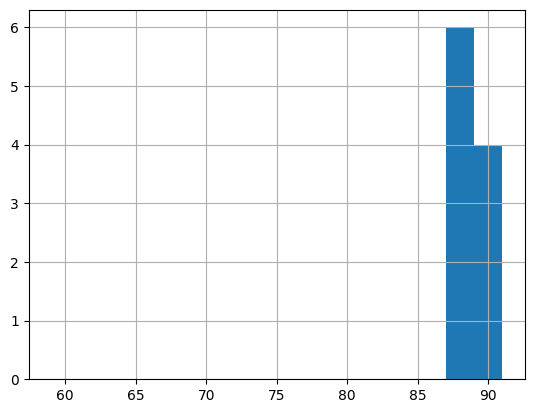

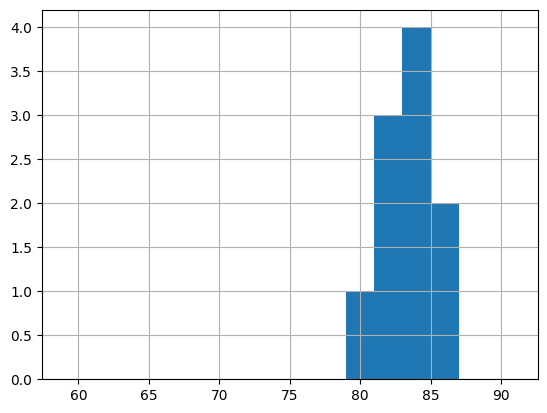

In [93]:
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

coffee_sample = coffee_ratings.sample(n=10)
coffee_sample["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

spotify_population and spotify_mysterious_sample are available; pandas as pd, matplotlib.pyplot as plt, and numpy as np are loaded.

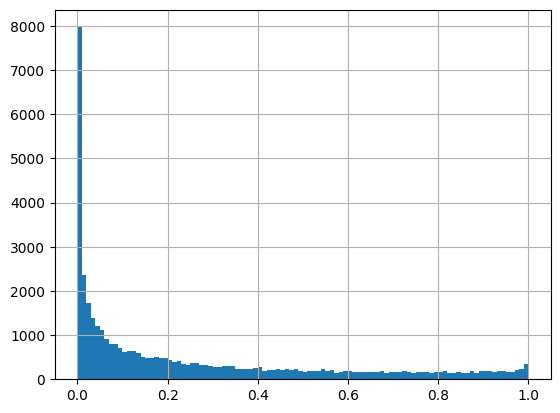

In [94]:
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

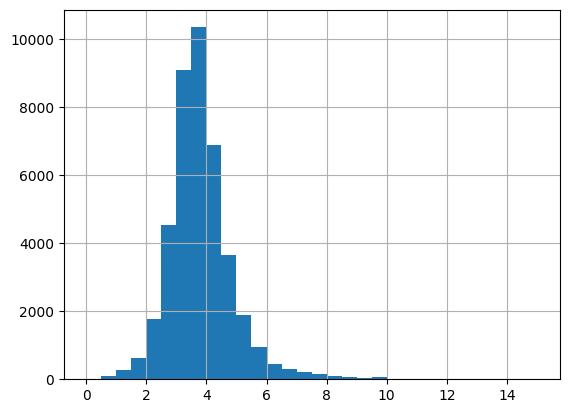

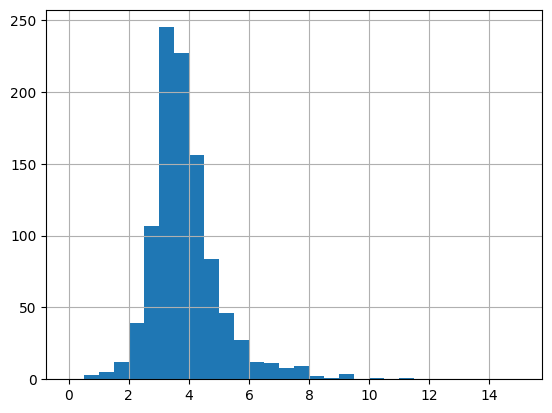

In [95]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

spotify_population_sample = spotify_population.sample(n=1000)
spotify_population_sample['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

#### **Pseudo-random number generation**

1. What does random mean?
{adjective} made, done, happening, or chosen without method or conscious decision.
2. True random numbers
Generated from physical processes, like flipping coins
Hotbits uses radioactive decay
RANDOM.ORG uses atmospheric noise
True randomness is expensive
3. Pseudo-random number generation
Pseudo-random number generation is cheap and fast
Next "random" number calculated from previous "random" number
The first "random" number calculated from a seed
The same seed value yields the same random numbers
4. Pseudo-random number generation example
seed = 1
calc_next_random(seed)
calc_next_random(3)
calc_next_random(2)

5. Random number generating functions
Prepend with numpy.random , such as numpy.random.beta()

function            distribution    
.beta               Beta            
.binomial           Binomial 
.chisquare          Chi-squared 
.exponential        Exponential 
.f                  F 
.gamma              Gamma 
.geometric          Geometric 
.hypergeometric     Hypergeometric
.lognormal          Lognormal
.negative_binomial  Negative binomial
.normal             Normal
.standard_t         t
.uniform            Uniform
.poisson            Poisson

6. Visualizing random numbers
randoms = np.random.beta(a=2, b=2, size=5000)
randoms
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

7. Random numbers seeds
np.random.seed(20000229)
np.random.normal(loc=2, scale=1.5, size=2)
np.random.normal(loc=2, scale=1.5, size=2)

In [96]:
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

array([0.6646709 , 0.31606437, 0.07733931, ..., 0.38157405, 0.49186245,
       0.49232446])

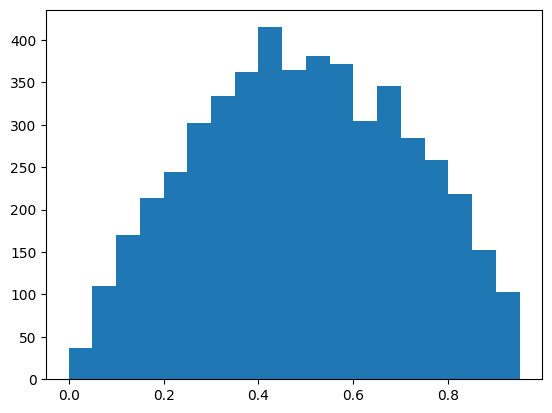

In [97]:
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

In [98]:
np.random.seed(20000229)
display(np.random.normal(loc=2, scale=1.5, size=2))
display(np.random.normal(loc=2, scale=1.5, size=2))

array([-0.59030264,  1.87821258])

array([2.52619561, 4.9684949 ])

In [99]:
np.random.seed(20041004)
display(np.random.normal(loc=2, scale=1.5, size=2))
display(np.random.normal(loc=2, scale=1.5, size=2))

array([1.09364337, 4.55285159])

array([2.67038916, 2.36677492])

Generating random numbers
You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

matplotlib.pyplot is loaded as plt, and numpy is loaded as np.

In [100]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform (low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

[1.31207896 2.65406494 0.16554078 ... 0.32216778 1.19004017 1.5796729 ]


In [101]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[8.77033628 6.84321057 7.47245163 ... 1.48283423 4.66959453 1.66179071]


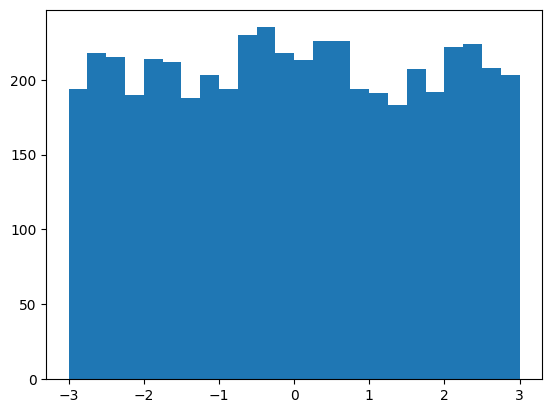

In [102]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

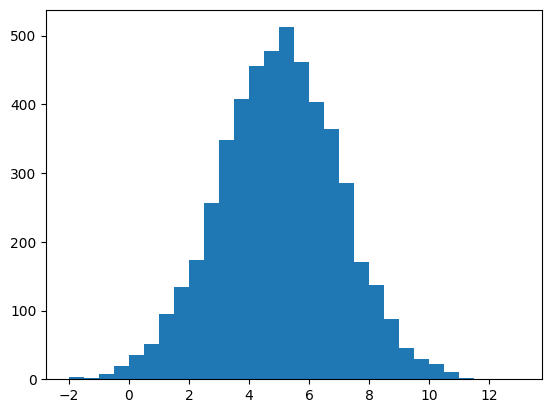

In [103]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

In [104]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


None

In [105]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

In [106]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
display(print(x))
display(print(y))

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


None

[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


None

## **Sampling Methods (Module 02-053)**

#### **Simple random and systematic sampling**

1. Simple random sampling with pandas
coffee_ratings.sample(n=5, random_state=19000113)

2. Systematic sampling - defining the interval
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size
print(interval)

3. Systematic sampling - selecting the rows //The trouble with systematic sampling

coffee_ratings.iloc[::interval]

coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

4. Making systematic sampling safe

shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

In [107]:
display(
coffee_ratings.sample(n=5, random_state=19000113)
)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


In [108]:
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size
print(interval)
coffee_ratings.iloc[::interval]


1338
267


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


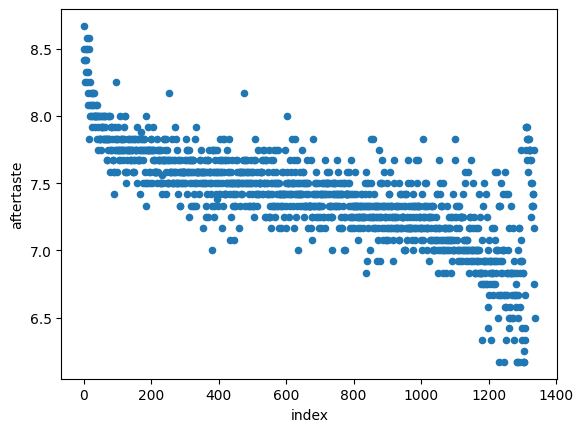

In [109]:
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

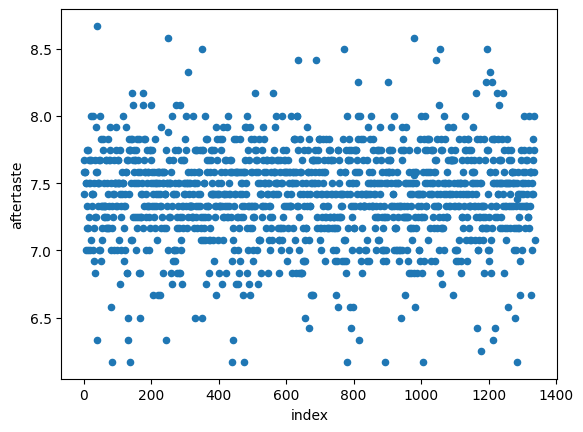

In [110]:
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

attrition_pop is available; pandas as pd is loaded.

In [111]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

attrition_pop is available; pandas has been pre-loaded as pd.

In [112]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)
print(pop_size)
# Calculate the interval
interval = pop_size // sample_size
print(interval)

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

1470
21
      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sci

Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

attrition_pop is available; pandas is loaded as pd, and matplotlib.pyplot as plt.

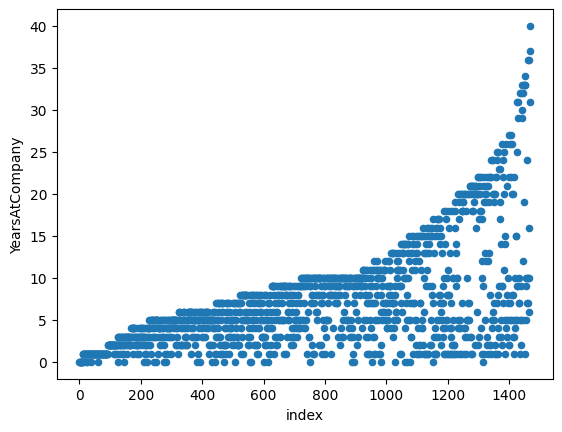

In [113]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

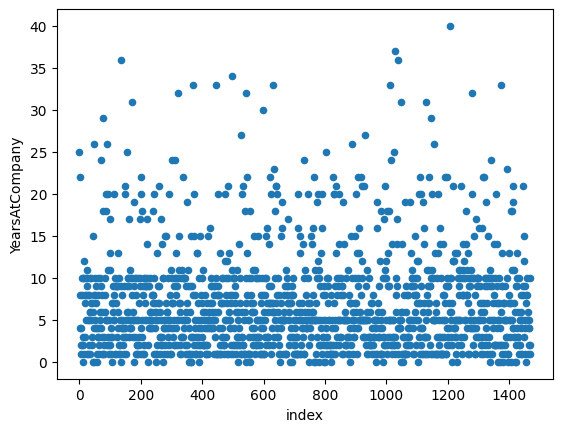

In [114]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

#### **Stratified and weighted random sampling**

1. Coffees by country
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)
2. Filtering for 6 countries
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
3. Counts of a simple random sample
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

4. Proportional stratified sampling
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)
5. Equal counts stratified sampling
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
.sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

6. Weighted random sampling
import numpy as np
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

In [115]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

In [116]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala",
"Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]

coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

In [117]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
.sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)


Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

In [118]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
.sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)


Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

In [119]:
import numpy as np
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

C:\Users\mcaba\AppData\Local\Temp\ipykernel_16104\2890812173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)


Mexico                    0.306818
Taiwan                    0.193182
Brazil                    0.147727
Colombia                  0.136364
Guatemala                 0.136364
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

attrition_pop is available; pandas is loaded with its usual alias.

In [120]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education")\
.sample(frac=0.4, random_state=2022)


# Print the sample
print(attrition_strat)



Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Development   
17

In [121]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)


Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

attrition_pop is available; pandas is loaded with its usual alias.

In [122]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education")\
.sample(n=30, random_state=2022)



# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [123]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

attrition_pop is available; pandas, matplotlib.pyplot, and numpy are loaded with their usual aliases.

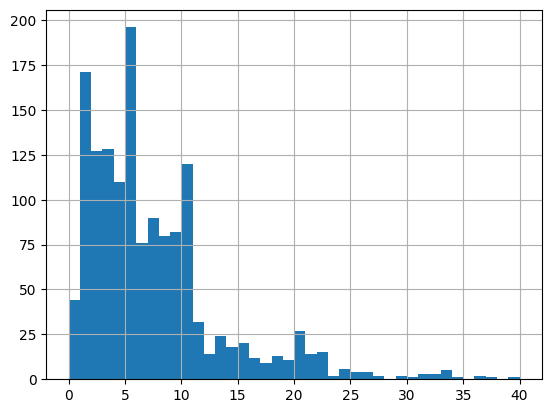

In [124]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))
plt.show()

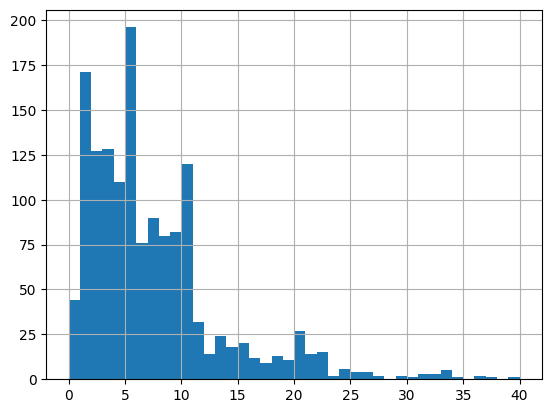

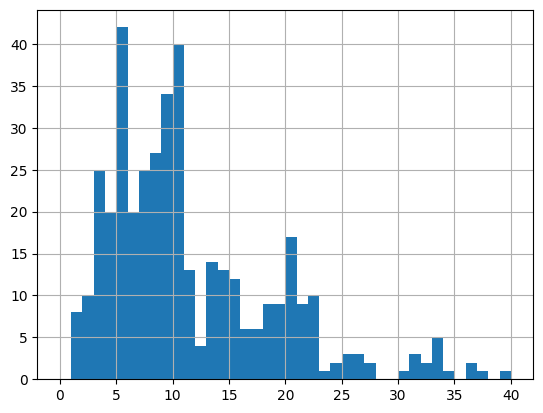

In [127]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()



#### **Cluster sampling**

1. Stratified sampling vs. cluster sampling
Stratified sampling
    Split the population into subgroups
    Use simple random sampling on every subgroup
Cluster sampling
    Use simple random sampling to pick some subgroups
    Use simple random sampling on only those subgroups
2. Varieties of coffee
varieties_pop = list(coffee_ratings['variety'].unique())

[None, 'Other', 'Bourbon', 'Catimor',
'Ethiopian Yirgacheffe','Caturra',
'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona',
'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai',
'Pacamara', 'Typica', 'Sumatra Lintong',
'Mundo Novo', 'Java', 'Peaberry', 'Pacas',
'Mandheling', 'Ruiru 11', 'Arusha',
'Ethiopian Heirlooms', 'Moka Peaberry',
'Sulawesi', 'Blue Mountain', 'Marigojipe',
'Pache Comun']
3. Stage 1: sampling for subgroups
import random
varieties_samp = random.sample(varieties_pop, k=3)

['Hawaiian Kona', 'Bourbon', 'SL28']
4. Stage 2: sampling each groupStage 2: sampling each group
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()
coffee_ratings_cluster.groupby("variety")\
.sample(n=5, random_state=2021)

5. Multistage sampling
Cluster sampling is a type of multistage sampling
Can have > 2 stages
E.g., countrywide surveys may sample states, counties, cities, and neighborhoods

In [ ]:
varieties_pop = list(coffee_ratings['variety'].unique())
print(varieties_pop)


[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun']


In [139]:
import random
varieties_samp = random.sample(varieties_pop, k=3)
print(varieties_samp)

['Hawaiian Kona', 'Bourbon', 'Yellow Bourbon']


In [143]:
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()

coffee_ratings_cluster.groupby("variety")\
.sample(n=5, random_state=2021)

C:\Users\mcaba\AppData\Local\Temp\ipykernel_16104\325015625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
C:\Users\mcaba\AppData\Local\Temp\ipykernel_16104\325015625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
575,82.83,Arabica,juan luis alvarado romero,Guatemala,agropecuaria quiagral,None,beneficio ixchel,11/23/0934,"unex guatemala, s.a.",4300,...,Green,10.0,"July 9th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
560,82.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0513,beneficio ixchel,11/23/0513,"unex guatemala, s.a.",1700,...,Green,2.0,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
524,83.00,Arabica,juan luis alvarado romero,Guatemala,la igualdad,None,beneficio la igualdad,11/194/07,"nuevos mercados, s.a.",4500,...,Green,2.0,"April 27th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60
1140,79.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0639,beneficio ixchel,11/23/0639,"unex guatemala, s.a.",1700,...,Green,2.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.00,934.00,934.00
308,83.75,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,K#13150104,kona pacific farmers cooperative,None,...,Bluish-Green,0.0,"May 2nd, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
851,81.83,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,KF315210,kona pacific farmers cooperative,None,...,Bluish-Green,1.0,"March 6th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
405,83.33,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP012314,kona pacific farmers cooperative,None,...,Bluish-Green,1.0,"February 25th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
176,84.42,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2234501 KONA FANCY,kona pacific farmers cooperative,None,...,Blue-Green,1.0,"January 21st, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
430,83.25,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,KF313630,kona pacific farmers cooperative,None,...,Bluish-Green,4.0,"March 21st, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN


Performing cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

attrition_pop is available; pandas is loaded with its usual alias, and the random package is available. A seed of 19790801 has also been set with random.seed().

## **Sampling Distributions (Module 03-053)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

## **Bootstrap Distributions (Module 04-053)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

## **XXX (Module 05-XXX)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

In [1]:
print('Perrenque!')

Perrenque!
